<h2>Feature Selection</h2>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/pokemon.csv')
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
pokemon_df = data.iloc[:100,:]
pokemon_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,88,Grimer,Poison,NaN,325,80,80,50,40,50,25,1,False
96,89,Muk,Poison,NaN,500,105,105,75,65,100,50,1,False
97,90,Shellder,Water,NaN,305,30,65,100,45,25,40,1,False
98,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False


In [4]:
pokemon_df.describe(exclude='number')

,Name,Type 1,Type 2,Legendary
count,100,100,51,100
unique,100,13,10,1
top,Bulbasaur,Water,Poison,False
freq,1,18,19,100


<h2>Feature Extraction</h2>

In [5]:
import seaborn as sns

In [6]:
ansur_df = pd.read_csv("data/ansurmale.csv")
ansur_df

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,Combat Arms,Army National Guard,Male,235,1353,312,216,1263,228,193,...,210,347,1016,163,778,67.5,1.688,23.689663,Normal,Normal
4078,Combat Arms,Army National Guard,Male,247,1473,336,234,1346,253,196,...,235,385,1082,178,873,89.6,1.765,28.761967,Overweight,Tall
4079,Combat Arms,Army National Guard,Male,264,1394,313,227,1280,245,193,...,258,353,1011,178,822,83.2,1.690,29.130633,Overweight,Normal
4080,Combat Arms,Army National Guard,Male,203,1417,327,223,1314,250,196,...,192,350,1062,172,837,73.1,1.718,24.766866,Normal,Normal


In [7]:
ansur_df.shape

(4082, 99)

In [9]:
object_columns = ansur_df.select_dtypes(include=['object']).columns
len(object_columns)

5

In [10]:
numeric_ansurdf = ansur_df.drop(object_columns,axis=1)
numeric_ansurdf

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,266,1467,337,222,1347,253,202,401,369,274,...,329,933,240,440,1054,175,853,81.5,1.776,25.838761
1,233,1395,326,220,1293,245,193,394,338,257,...,316,870,225,371,1054,167,815,72.6,1.702,25.062103
2,287,1430,341,230,1327,256,196,427,408,261,...,329,964,255,411,1041,180,831,92.9,1.735,30.861480
3,234,1347,310,230,1239,262,199,401,359,262,...,315,857,205,399,968,176,793,79.4,1.655,28.988417
4,250,1585,372,247,1478,267,224,435,356,263,...,303,868,214,379,1245,188,954,94.6,1.914,25.823034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,235,1353,312,216,1263,228,193,384,318,241,...,279,816,210,347,1016,163,778,67.5,1.688,23.689663
4078,247,1473,336,234,1346,253,196,428,374,284,...,351,978,235,385,1082,178,873,89.6,1.765,28.761967
4079,264,1394,313,227,1280,245,193,407,367,271,...,333,991,258,353,1011,178,822,83.2,1.690,29.130633
4080,203,1417,327,223,1314,250,196,419,365,271,...,293,783,192,350,1062,172,837,73.1,1.718,24.766866


In [11]:
from sklearn.manifold import TSNE


In [12]:
m = TSNE(learning_rate=100)
tsne_feature = m.fit_transform(numeric_ansurdf)


In [13]:
tsne_feature.shape

(4082, 2)

In [14]:
ansur_df['x']= tsne_feature[:,0]
ansur_df['y']= tsne_feature[:,1]

<Axes: xlabel='x', ylabel='y'>

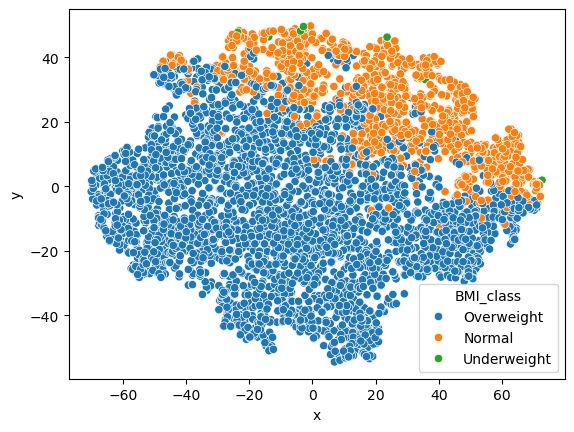

In [15]:
sns.scatterplot(x= "x",y= "y",data=ansur_df,hue="BMI_class")
